## opdracht 15

In [1]:
import pandas as pd
import seaborn as sns


In [2]:
penguins = sns.load_dataset("penguins")

In [3]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


## Multivariate analyses: Models

training the model

In [4]:
from sklearn.tree import DecisionTreeClassifier

dit is een package van python

target variable = de kollom waar je een berekening op probeert te doen.

feature variable/independent variables = de kollommen die gebruikt worden om deze calculation te doen.

target variable is hier de species en de bill_length_mm is de feature.

In [5]:
penguins.bill_length_mm.mean()

43.92192982456142

In [6]:
penguins = penguins.fillna(penguins.bill_length_mm.mean())

ik vul hier alle waardes met 0.

In [7]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.00000,3750.00000,Male
1,Adelie,Torgersen,39.50000,17.40000,186.00000,3800.00000,Female
2,Adelie,Torgersen,40.30000,18.00000,195.00000,3250.00000,Female
3,Adelie,Torgersen,43.92193,43.92193,43.92193,43.92193,43.9219
4,Adelie,Torgersen,36.70000,19.30000,193.00000,3450.00000,Female


In [8]:

features=['bill_length_mm']

dt = DecisionTreeClassifier(max_depth= 1) # increase max_depth to see effect in the plot
dt.fit(penguins[features], penguins['species'])

DecisionTreeClassifier(max_depth=1)

fit = trainen, ik zeg hier geef de penguins data mee en leer van de bill_length_mm data.

daarna geef ik penguins species als target mee.

In [9]:
from sklearn import tree
import graphviz

def plot_tree_classification(model, features, class_names):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          class_names=class_names,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

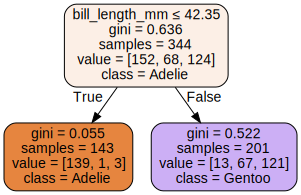

In [10]:
plot_tree_classification(dt, features, penguins.species.unique())

If we want to turn this into a data product, then we must know how well our model performs.

## Evaluating the model

In [11]:
predictions = dt.predict(penguins[features])

In [12]:
predictions

array(['Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adel

In [13]:
def calculate_accuracy(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (predictions == actuals).sum() / len(actuals)

accuracy = hoeveel % hebben wij nu juist en hoeveel hebben wij nu slecht

hier is functie opgesteld ,wij geven de precitions mee(wat denkt de boom dat het is)

we geven ook actuals mee(wat is nu echt)

we kijken dan van de prediction is dat hetzelfde als wat echt is (dit tellen we op)

en delen we door het aantal actuals.

In [14]:
calculate_accuracy(predictions, penguins.species)

0.7558139534883721

76% correct

## test/train split

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
penguins_train, penguins_test = train_test_split(penguins, test_size=0.3, stratify=penguins['species'], random_state=42)
print(penguins_train.shape, penguins_test.shape)

(240, 7) (104, 7)


In [17]:
penguins_train.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
36,Adelie,Dream,38.8,20.0,190.0,3950.0,Male
19,Adelie,Torgersen,46.0,21.5,194.0,4200.0,Male
260,Gentoo,Biscoe,42.7,13.7,208.0,3950.0,Female
109,Adelie,Biscoe,43.2,19.0,197.0,4775.0,Male
89,Adelie,Dream,38.9,18.8,190.0,3600.0,Female


In [18]:
penguins.species.value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [19]:
penguins_train.species.value_counts()

Adelie       106
Gentoo        87
Chinstrap     47
Name: species, dtype: int64

In [20]:
penguins_test.species.value_counts()

Adelie       46
Gentoo       37
Chinstrap    21
Name: species, dtype: int64

decision tree met train set

In [21]:
features= ['bill_length_mm']
dt_classification = DecisionTreeClassifier(max_depth = 1) # Increase max_depth to see effect in the plot
dt_classification.fit(penguins_train[features], penguins_train['species'])

DecisionTreeClassifier(max_depth=1)

In [22]:
predictionsOnTrainset = dt_classification.predict(penguins_train[features])
predictionsOnTestset = dt_classification.predict(penguins_test[features])

accuracyTrain = calculate_accuracy(predictionsOnTrainset, penguins_train.species)
accuracyTest = calculate_accuracy(predictionsOnTestset, penguins_test.species)

print("Accuracy on training set " + str(accuracyTrain))
print("Accuracy on test set " + str(accuracyTest))

Accuracy on training set 0.7708333333333334
Accuracy on test set 0.7403846153846154


## OVERFITTING 

In [23]:
features= ['bill_length_mm']
dt_classification = DecisionTreeClassifier(max_depth = 10) # Increase max_depth to see effect in the plot
dt_classification.fit(penguins_train[features], penguins_train['species'])

DecisionTreeClassifier(max_depth=10)

In [24]:
predictionsOnTrainset = dt_classification.predict(penguins_train[features])
predictionsOnTestset = dt_classification.predict(penguins_test[features])

accuracyTrain = calculate_accuracy(predictionsOnTrainset, penguins_train.species)
accuracyTest = calculate_accuracy(predictionsOnTestset, penguins_test.species)

print("Accuracy on training set " + str(accuracyTrain))
print("Accuracy on test set " + str(accuracyTest))

Accuracy on training set 0.8958333333333334
Accuracy on test set 0.7019230769230769


## accuracy veranderd als de max_depth word aangepast, training set word hoger en test set wordt lager.

## Opdracht 17

In [25]:
from sklearn.tree import DecisionTreeRegressor

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
features= ['bill_length_mm']
dt_regression = DecisionTreeRegressor(max_depth = 1) # Increase max_depth to see effect in the plot
dt_regression.fit(penguins_train[features], penguins_train['body_mass_g'])

DecisionTreeRegressor(max_depth=1)

In [28]:
from sklearn import tree
import graphviz

def plot_tree_regression(model, features):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

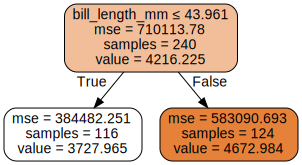

In [29]:
plot_tree_regression(dt_regression, features)

# als de bill_length_mm kleiner is dan 43.961 dan gaan we naar true en als dit niet zo is gaan we naar false. We verwachten als het kleiner is dan 43.961 dat de body_mass_g 3727.965 is. 

# als de bill_length_mm groter is dan 43.961 dan gaan we naar true en als dit niet zo is gaan we naar false. We verwachten als het kleiner is dan 43.961 dat de body_mass_g 4672.984 is

mse = mean square error

## evalueren van model

rmse = root mean square error, wat is de gemiddelde fout die we gaan zien.

In [30]:
def calculate_rmse(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (((predictions - actuals) ** 2).sum() / len(actuals)) ** (1/2)

## The same function but using a for-loop instead of a vectorized operation. 
# def calculate_rmse(predictions, actuals):
#    if(len(predictions) != len(actuals)):
#        raise Exception("The amount of predictions did not equal the amount of actuals")
#    
#    diffSquared = 0
#    
#    for prediction_i, actual_i in zip(predictions, actuals):
#        diffSquared += (prediction_i - actual_i)**2
#        
#    return (diffSquared/len(actuals))**(1/2)

In [31]:
predictionsOnTrainset = dt_regression.predict(penguins_train[features])
predictionsOnTestset = dt_regression.predict(penguins_test[features])

rmseTrain = calculate_rmse(predictionsOnTrainset, penguins_train.body_mass_g)
rmseTest = calculate_rmse(predictionsOnTestset, penguins_test.body_mass_g)

print("RMSE on training set " + str(rmseTrain))
print("RMSE on test set " + str(rmseTest))

RMSE on training set 697.9230707711804
RMSE on test set 776.407406529374
